In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


In [ ]:
np.random.seed(42)
X = np.random.rand(1000, 5)
y = 50 + 20 * np.random.rand(1000)
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, learning_rate=0.01):
        self.lr = learning_rate
        self.w1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        self.w2 = np.random.randn(hidden_size, 1) * 0.1
        self.b2 = np.zeros((1, 1))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_deriv(self, a):
        return a * (1 - a)

    def forward(self, X):
        self.z1 = X @ self.w1 + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = self.a1 @ self.w2 + self.b2
        self.a2 = self.z2
        return self.a2

    def compute_loss(self, y_pred, y_true):
        return np.mean((y_pred - y_true.reshape(-1, 1)) ** 2)

    def backward(self, X, y):
        m = y.shape[0]
        dz2 = (self.a2 - y.reshape(-1, 1))
        dw2 = self.a1.T @ dz2 / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        dz1 = (dz2 @ self.w2.T) * self.sigmoid_deriv(self.a1)
        dw1 = X.T @ dz1 / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        self.w2 -= self.lr * dw2
        self.b2 -= self.lr * db2
        self.w1 -= self.lr * dw1
        self.b1 -= self.lr * db1

    def train(self, X, y, epochs=100):
        losses = []
        for _ in range(epochs):
            y_pred = self.forward(X)
            loss = self.compute_loss(y_pred, y)
            losses.append(loss)
            self.backward(X, y)
        return losses

    def predict(self, X):
        return self.forward(X).flatten()


<ipython-input-17-8d08b21045b9>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-958a4eed9099>:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(y_test_30, y_pred)


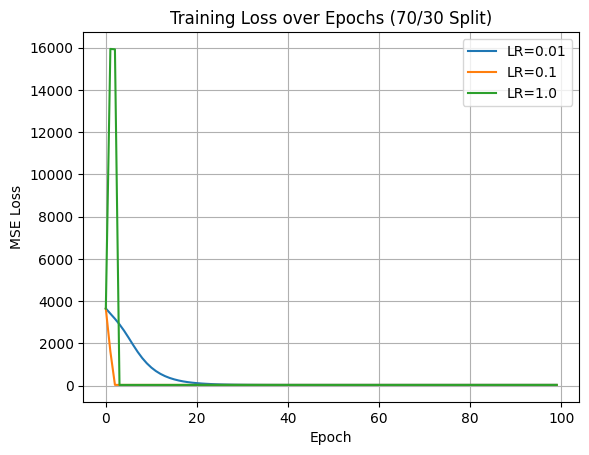

{0.01: {'losses': [np.float64(3654.5464867419378),
   np.float64(3408.0783983385086),
   np.float64(3166.010627235003),
   np.float64(2902.2628394826074),
   np.float64(2602.6835973395396),
   np.float64(2269.8543711760854),
   np.float64(1924.9541318492666),
   np.float64(1596.5167686678708),
   np.float64(1305.0580041642759),
   np.float64(1058.2197782073995),
   np.float64(854.7861987823075),
   np.float64(689.6449460929733),
   np.float64(556.7212749236259),
   np.float64(450.2562082837997),
   np.float64(365.23873920071924),
   np.float64(297.4780671627813),
   np.float64(243.5401978023568),
   np.float64(200.64314198349695),
   np.float64(166.5483187086387),
   np.float64(139.4620239786371),
   np.float64(117.95099731582154),
   np.float64(100.87214579178149),
   np.float64(87.31500332399045),
   np.float64(76.55508138589249),
   np.float64(68.01628681130771),
   np.float64(61.24077039107423),
   np.float64(55.86480620854079),
   np.float64(51.59953450249749),
   np.float64(48.21

In [ ]:
results_70_30 = {}
for lr in [0.01, 0.1, 1.0]:
    model = SimpleNeuralNetwork(input_size=5, hidden_size=10, learning_rate=lr)
    losses = model.train(X_train_70, y_train_70, epochs=100)
    y_pred = model.predict(X_test_30)
    mse = mean_squared_error(y_test_30, y_pred)
    r2 = r2_score(y_test_30, y_pred)
    rmse = np.sqrt(mse)
    corr, _ = pearsonr(y_test_30, y_pred)
    results_70_30[lr] = {
        "losses": losses,
        "mse": mse,
        "r2": r2,
        "rmse": rmse,
        "corr": corr
    }

for lr in results_70_30:
    plt.plot(results_70_30[lr]["losses"], label=f"LR={lr}")
plt.title("Training Loss over Epochs (70/30 Split)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()
results_70_30


In [ ]:
def relu(x): return np.maximum(0, x)
def relu_deriv(a): return (a > 0).astype(float)
def tanh(x): return np.tanh(x)
def tanh_deriv(a): return 1 - np.square(a)

class CustomNN:
    def __init__(self, activation='relu', input_size=5, hidden_size=10, lr=0.1):
        self.lr = lr
        self.activation_name = activation
        self.w1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        self.w2 = np.random.randn(hidden_size, 1) * 0.1
        self.b2 = np.zeros((1, 1))

    def activate(self, z):
        if self.activation_name == 'relu':
            return relu(z)
        elif self.activation_name == 'tanh':
            return tanh(z)

    def activate_deriv(self, a):
        if self.activation_name == 'relu':
            return relu_deriv(a)
        elif self.activation_name == 'tanh':
            return tanh_deriv(a)

    def forward(self, X):
        self.z1 = X @ self.w1 + self.b1
        self.a1 = self.activate(self.z1)
        self.z2 = self.a1 @ self.w2 + self.b2
        self.a2 = self.z2
        return self.a2

    def backward(self, X, y):
        m = y.shape[0]
        dz2 = (self.a2 - y.reshape(-1, 1))
        dw2 = self.a1.T @ dz2 / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        dz1 = (dz2 @ self.w2.T) * self.activate_deriv(self.a1)
        dw1 = X.T @ dz1 / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        self.w2 -= self.lr * dw2
        self.b2 -= self.lr * db2
        self.w1 -= self.lr * dw1
        self.b1 -= self.lr * db1

    def train(self, X, y, epochs=100):
        for _ in range(epochs):
            self.forward(X)
            self.backward(X, y)

    def predict(self, X):
        return self.forward(X).flatten()

activation_results = {}
for act in ['relu', 'tanh']:
    model = CustomNN(activation=act, lr=0.1)
    model.train(X_train_70, y_train_70, epochs=100)
    preds = model.predict(X_test_30)
    activation_results[act] = {
        'mse': mean_squared_error(y_test_30, preds),
        'rmse': np.sqrt(mean_squared_error(y_test_30, preds)),
        'r2': r2_score(y_test_30, preds),
        'corr': pearsonr(y_test_30, preds)[0]
    }

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_70, y_train_70)
rf_preds = rf.predict(X_test_30)
rf_metrics = {
    'mse': mean_squared_error(y_test_30, rf_preds),
    'rmse': np.sqrt(mean_squared_error(y_test_30, rf_preds)),
    'r2': r2_score(y_test_30, rf_preds),
    'corr': pearsonr(y_test_30, rf_preds)[0]
}

activation_results['random_forest'] = rf_metrics
activation_results


<ipython-input-19-999282df0792>:66: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  'corr': pearsonr(y_test_30, preds)[0]


{'relu': {'mse': 31.59029156686253,
  'rmse': np.float64(5.6205241363117135),
  'r2': -0.0005861860787563788,
  'corr': np.float64(nan)},
 'tanh': {'mse': 31.57232979398043,
  'rmse': np.float64(5.618926035638878),
  'r2': -1.726756196207546e-05,
  'corr': np.float64(0.027068442657466045)},
 'random_forest': {'mse': 32.254873170874916,
  'rmse': np.float64(5.679337388364502),
  'r2': -0.021636044738319704,
  'corr': np.float64(0.08371417074814239)}}

In [ ]:
# %% [markdown]
## Dependencies
# %% [code]
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from dataclasses import dataclass
import matplotlib.pyplot as plt

# %% [code]
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_prime(z):
    s = sigmoid(z)
    return s * (1 - s)

def relu(z):
    return np.maximum(0, z)

def relu_prime(z):
    return (z > 0).astype(float)

def tanh(z):
    return np.tanh(z)

def tanh_prime(z):
    return 1.0 - np.tanh(z)**2

def cost_derivative(output_activations, y):
    return output_activations - y

def mse_loss(predictions, targets):
    return np.mean((predictions - targets) ** 2)

def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    corr = np.corrcoef(y_true.flatten(), y_pred.flatten())[0, 1]
    return {"MSE": mse, "RMSE": rmse, "R2": r2, "Correlation": corr}

# %% [code]
@dataclass
class Network:
    num_layers: int
    biases: list
    weights: list
    activation: callable
    activation_prime: callable

def init_network(layers, activation='sigmoid'):
    act = {'sigmoid': (sigmoid, sigmoid_prime),
           'relu': (relu, relu_prime),
           'tanh': (tanh, tanh_prime)}[activation]

    return Network(
        num_layers=len(layers),
        biases=[np.random.randn(y, 1) for y in layers[1:]],
        weights=[np.random.randn(y, x) for x, y in zip(layers[:-1], layers[1:])],
        activation=act[0],
        activation_prime=act[1]
    )

# %% [code]
def feedforward(nn, a):
    for b, w in zip(nn.biases[:-1], nn.weights[:-1]):
        a = nn.activation(np.dot(w, a) + b)
    a = np.dot(nn.weights[-1], a) + nn.biases[-1]  # Linear output for regression
    return a

# %% [code]
def backprop(nn, x, y):
    nabla_b = [np.zeros(b.shape) for b in nn.biases]
    nabla_w = [np.zeros(w.shape) for w in nn.weights]

    activation = x
    activations = [x]
    zs = []

    # Feedforward
    for b, w in zip(nn.biases[:-1], nn.weights[:-1]):
        z = np.dot(w, activation) + b
        zs.append(z)
        activation = nn.activation(z)
        activations.append(activation)

    # Output layer (linear)
    z = np.dot(nn.weights[-1], activation) + nn.biases[-1]
    zs.append(z)
    activations.append(z)

    # Backward pass
    delta = cost_derivative(activations[-1], y)
    nabla_b[-1] = delta
    nabla_w[-1] = np.dot(delta, activations[-2].T)

    # Hidden layers
    for l in range(2, nn.num_layers):
        z = zs[-l]
        sp = nn.activation_prime(z)
        delta = np.dot(nn.weights[-l + 1].T, delta) * sp
        nabla_b[-l] = delta
        nabla_w[-l] = np.dot(delta, activations[-l - 1].T)

    return (nabla_b, nabla_w)

# %% [code]
def update_mini_batch(nn, mini_batch, eta):
    nabla_b = [np.zeros(b.shape) for b in nn.biases]
    nabla_w = [np.zeros(w.shape) for w in nn.weights]

    for x, y in mini_batch:
        delta_nabla_b, delta_nabla_w = backprop(nn, x, y)
        nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
        nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]

    nn.weights = [w - (eta / len(mini_batch)) * nw for w, nw in zip(nn.weights, nabla_w)]
    nn.biases = [b - (eta / len(mini_batch)) * nb for b, nb in zip(nn.biases, nabla_b)]

# %% [code]
def train_network(nn, training_data, test_data, epochs, mini_batch_size, eta):
    loss_history = []
    for j in range(epochs):
        random.shuffle(training_data)
        mini_batches = [training_data[k: k + mini_batch_size] for k in range(0, len(training_data), mini_batch_size)]

        for batch in mini_batches:
            update_mini_batch(nn, batch, eta)

        predictions = [feedforward(nn, x) for x, y in test_data]
        targets = [y for x, y in test_data]
        predictions = np.array(predictions).reshape(-1, 1)
        targets = np.array(targets).reshape(-1, 1)

        loss = mse_loss(predictions, targets)
        loss_history.append(loss)
        print(f"Epoch {j+1}: MSE = {loss:.4f}")
    return loss_history

# %% [code]
def load_pm25_dataset(filepath):
    df = pd.read_csv(filepath)
    df = df.dropna()

    X = df.drop(columns=["PM2.5"]).values
    y = df["PM2.5"].values.reshape(-1, 1)

    scaler_x = StandardScaler()
    scaler_y = StandardScaler()

    X_scaled = scaler_x.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y)

    return X_scaled, y_scaled, scaler_y

# %% [code]
def prepare_data(filepath, test_size=0.3, val_size=None):
    X, y, scaler_y = load_pm25_dataset(filepath)

    if val_size:
        X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        val_portion = val_size / (1 - test_size)
        X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=val_portion, random_state=42)
        return (X_train, y_train), (X_val, y_val), (X_test, y_test), scaler_y
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        return (X_train, y_train), None, (X_test, y_test), scaler_y



== 70_30 ==

Training with learning rate 0.01
Epoch 1: MSE = 1.3957
Epoch 2: MSE = 1.2675
Epoch 3: MSE = 1.2153
Epoch 4: MSE = 1.1857
Epoch 5: MSE = 1.1672
Epoch 6: MSE = 1.1550
Epoch 7: MSE = 1.1470
Epoch 8: MSE = 1.1411
Epoch 9: MSE = 1.1327
Epoch 10: MSE = 1.1267
Epoch 11: MSE = 1.1231
Epoch 12: MSE = 1.1180
Epoch 13: MSE = 1.1155
Epoch 14: MSE = 1.1210
Epoch 15: MSE = 1.1102
Epoch 16: MSE = 1.1083
Epoch 17: MSE = 1.1050
Epoch 18: MSE = 1.1023
Epoch 19: MSE = 1.1003
Epoch 20: MSE = 1.1038
Epoch 21: MSE = 1.0962
Epoch 22: MSE = 1.0960
Epoch 23: MSE = 1.0927
Epoch 24: MSE = 1.0936
Epoch 25: MSE = 1.0881
Epoch 26: MSE = 1.0858
Epoch 27: MSE = 1.0875
Epoch 28: MSE = 1.0813
Epoch 29: MSE = 1.0800
Epoch 30: MSE = 1.0800
Epoch 31: MSE = 1.0755
Epoch 32: MSE = 1.0708
Epoch 33: MSE = 1.0674
Epoch 34: MSE = 1.0651
Epoch 35: MSE = 1.0619
Epoch 36: MSE = 1.0593
Epoch 37: MSE = 1.0569
Epoch 38: MSE = 1.0554
Epoch 39: MSE = 1.0610
Epoch 40: MSE = 1.0504
Epoch 41: MSE = 1.0485
Epoch 42: MSE = 1.0

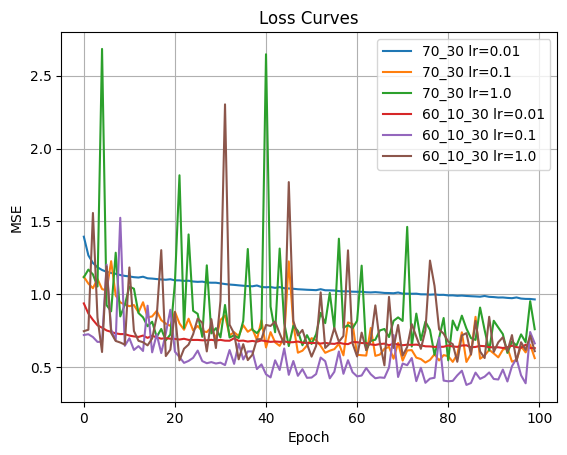


Best config: ('70_30', 0.1)
Metrics: {'MSE': 12443.877532718092, 'RMSE': np.float64(111.5521292164255), 'R2': 0.4940568827304116, 'Correlation': np.float64(0.7106462719308064)}

== Activation Function Comparison ==
Epoch 1: MSE = 116562109829529310482688305258620730186239535297054574028206748205056.0000
Epoch 2: MSE = 12675407509912740956410816657589581373008510976.0000
Epoch 3: MSE = 1378372060846571523145728.0000
Epoch 4: MSE = 149.3586
Epoch 5: MSE = 0.7516
Epoch 6: MSE = 0.7543
Epoch 7: MSE = 0.7507
Epoch 8: MSE = 0.7487
Epoch 9: MSE = 0.7477
Epoch 10: MSE = 0.7559
Epoch 11: MSE = 0.7523
Epoch 12: MSE = 0.7472
Epoch 13: MSE = 0.7769
Epoch 14: MSE = 0.7488
Epoch 15: MSE = 0.7704
Epoch 16: MSE = 0.7532
Epoch 17: MSE = 0.7936
Epoch 18: MSE = 0.7521
Epoch 19: MSE = 0.7589
Epoch 20: MSE = 0.7542
Epoch 21: MSE = 0.7474
Epoch 22: MSE = 0.7486
Epoch 23: MSE = 0.7503
Epoch 24: MSE = 0.7525
Epoch 25: MSE = 0.7480
Epoch 26: MSE = 0.7477
Epoch 27: MSE = 0.7472
Epoch 28: MSE = 0.7472
Epoch 29:

In [ ]:
# %%
import numpy as np
import pandas as pd
import random
from dataclasses import dataclass
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# ----------------------------
# Activation functions
# ----------------------------
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))

def relu(z):
    return np.maximum(0, z)

def relu_prime(z):
    return (z > 0).astype(float)

def tanh(z):
    return np.tanh(z)

def tanh_prime(z):
    return 1.0 - np.tanh(z)**2

# ----------------------------
# Data and evaluation
# ----------------------------
# ----------------------------
# Data and evaluation
# ----------------------------
def load_pm25_dataset(filepath):
    df = pd.read_csv(filepath).dropna()

    # Keep only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    # Check if 'avg_pm25' is still in numeric columns
    if "avg_pm25" not in numeric_df.columns:
        raise ValueError("'avg_pm25' column missing or non-numeric")

    X = numeric_df.drop(columns=["avg_pm25"]).values
    y = numeric_df["avg_pm25"].values.reshape(-1, 1)

    # Normalize
    x_scaler = StandardScaler()
    y_scaler = StandardScaler()
    X_scaled = x_scaler.fit_transform(X)
    y_scaled = y_scaler.fit_transform(y)

    return X_scaled, y_scaled, y_scaler


def evaluate_regression(y_true, y_pred):
    # Ensure y_true and y_pred are 2D with shape (n_samples, 1)
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)

    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    corr = np.corrcoef(y_true.flatten(), y_pred.flatten())[0, 1]
    return {"MSE": mse, "RMSE": rmse, "R2": r2, "Correlation": corr}

# ----------------------------
# Neural network
# ----------------------------
@dataclass
class Network:
    num_layers: int
    biases: list
    weights: list
    activation: callable
    activation_prime: callable

def init_network(layers, activation='sigmoid'):
    act = {'sigmoid': (sigmoid, sigmoid_prime),
           'relu': (relu, relu_prime),
           'tanh': (tanh, tanh_prime)}[activation]
    return Network(
        num_layers=len(layers),
        biases=[np.random.randn(y, 1) for y in layers[1:]],
        weights=[np.random.randn(y, x) for x, y in zip(layers[:-1], layers[1:])],
        activation=act[0],
        activation_prime=act[1]
    )

def feedforward(nn, a):
    for b, w in zip(nn.biases[:-1], nn.weights[:-1]):
        a = nn.activation(np.dot(w, a) + b)
    return np.dot(nn.weights[-1], a) + nn.biases[-1]  # Linear output

def cost_derivative(output, y):
    # Ensure y is 2D with shape (1, 1) or similar for consistency in backprop
    return output - y

def backprop(nn, x, y):
    nabla_b = [np.zeros(b.shape) for b in nn.biases]
    nabla_w = [np.zeros(w.shape) for w in nn.weights]
    activation = x
    activations = [x]
    zs = []

    for b, w in zip(nn.biases[:-1], nn.weights[:-1]):
        z = np.dot(w, activation) + b
        zs.append(z)
        activation = nn.activation(z)
        activations.append(activation)

    z = np.dot(nn.weights[-1], activation) + nn.biases[-1]
    zs.append(z)
    activations.append(z)

    # Ensure y has the same shape as activations[-1] for subtraction
    delta = cost_derivative(activations[-1], y)
    nabla_b[-1] = delta
    nabla_w[-1] = np.dot(delta, activations[-2].T)

    for l in range(2, nn.num_layers):
        z = zs[-l]
        sp = nn.activation_prime(z)
        delta = np.dot(nn.weights[-l + 1].T, delta) * sp
        nabla_b[-l] = delta
        nabla_w[-l] = np.dot(delta, activations[-l - 1].T)

    return (nabla_b, nabla_w)

def update_batch(nn, mini_batch, eta):
    nabla_b = [np.zeros(b.shape) for b in nn.biases]
    nabla_w = [np.zeros(w.shape) for w in nn.weights]
    for x, y in mini_batch:
        # Ensure x and y have the correct shapes for feedforward and backprop
        x_shaped = x.reshape(-1, 1) if x.ndim == 1 else x
        y_shaped = y.reshape(-1, 1) if y.ndim == 1 else y

        db, dw = backprop(nn, x_shaped, y_shaped)
        nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, db)]
        nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, dw)]
    nn.weights = [w - (eta / len(mini_batch)) * nw for w, nw in zip(nn.weights, nabla_w)]
    nn.biases = [b - (eta / len(mini_batch)) * nb for b, nb in zip(nn.biases, nabla_b)]

def train_network(nn, training_data, test_data, epochs, batch_size, eta):
    loss_history = []
    for j in range(epochs):
        random.shuffle(training_data)
        batches = [training_data[k: k + batch_size] for k in range(0, len(training_data), batch_size)]
        for batch in batches:
            update_batch(nn, batch, eta)
        # Explicitly reshape predictions and targets to be (n_samples, 1)
        preds = np.array([feedforward(nn, x.reshape(-1, 1)) for x, _ in test_data]).reshape(-1, 1)
        targets = np.array([y.reshape(-1, 1) for _, y in test_data]).reshape(-1, 1)

        loss = mean_squared_error(targets, preds)
        loss_history.append(loss)
        print(f"Epoch {j+1}: MSE = {loss:.4f}")
    return loss_history, preds, targets

# ----------------------------
# Experiment runner
# ----------------------------
def run_experiment(filepath):
    X, y, y_scaler = load_pm25_dataset(filepath)

    splits = {
        "70_30": train_test_split(X, y, test_size=0.3, random_state=1),
        "60_10_30": train_test_split(X, y, test_size=0.3, random_state=2)
    }

    results = {}

    for label, split in splits.items():
        X_train, X_test, y_train, y_test = split
        if label == "60_10_30":
            X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/6, random_state=3)
        # Ensure data points are (features, 1) and targets are (1, 1)
        train_data = list(zip([x.reshape(-1, 1) for x in X_train], [y.reshape(-1, 1) for y in y_train]))
        test_data = list(zip([x.reshape(-1, 1) for x in X_test], [y.reshape(-1, 1) for y in y_test]))

        print(f"\n== {label} ==")
        for lr in [0.01, 0.1, 1.0]:
            print(f"\nTraining with learning rate {lr}")
            # Input layer size should match the number of features
            nn = init_network([X_train.shape[1], 20, 10, 1], activation="sigmoid")
            loss, y_pred_scaled, y_true_scaled = train_network(nn, train_data, test_data, 100, 16, lr)
            y_pred = y_scaler.inverse_transform(y_pred_scaled)
            y_true = y_scaler.inverse_transform(y_true_scaled)
            metrics = evaluate_regression(y_true, y_pred)
            results[(label, lr)] = (loss, metrics)
            print(metrics)
            plt.plot(loss, label=f"{label} lr={lr}")

    plt.title("Loss Curves")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid()
    plt.show()

    # Best model (choose lowest final loss)
    best = min(results.items(), key=lambda x: x[1][0][-1])
    print("\nBest config:", best[0])
    print("Metrics:", best[1][1])

    # Compare with ReLU and Tanh
    print("\n== Activation Function Comparison ==")
    # Use the training and test data from the last split for consistency
    X_train, X_test, y_train, y_test = splits["60_10_30"] if "60_10_30" in splits else splits["70_30"]
    train_data = list(zip([x.reshape(-1, 1) for x in X_train], [y.reshape(-1, 1) for y in y_train]))
    test_data = list(zip([x.reshape(-1, 1) for x in X_test], [y.reshape(-1, 1) for y in y_test]))


    for act in ["relu", "tanh"]:
        nn = init_network([X_train.shape[1], 20, 10, 1], activation=act)
        loss, y_pred_scaled, y_true_scaled = train_network(nn, train_data, test_data, 100, 16, best[0][1])
        y_pred = y_scaler.inverse_transform(y_pred_scaled)
        y_true = y_scaler.inverse_transform(y_true_scaled)
        metrics = evaluate_regression(y_true, y_pred)
        print(f"Activation: {act}, Metrics: {metrics}")

    # Random Forest baseline
    print("\n== Random Forest Baseline ==")
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    # Need to flatten y_train for Random Forest fit
    rf.fit(X_train, y_train.ravel())
    y_rf = rf.predict(X_test).reshape(-1, 1) # Reshape predictions back to (n_samples, 1)
    rf_metrics = evaluate_regression(y_scaler.inverse_transform(y_test), y_scaler.inverse_transform(y_rf))
    print("Random Forest Metrics:", rf_metrics)

# ----------------------------
# Run
# ----------------------------
run_experiment("all_months_merged_elevation_data.csv")